In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss

In [2]:
sns.set(
    font_scale = 2,
    style = "whitegrid",
    rc = {"figure.figsize" : (20,10)}
)

In [3]:
df = pd.read_csv("/mnt/HC_Volume_18315164/home-jupyter/jupyter-an-bogdanov/conversion.csv")

In [4]:
df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710000,8,2


In [5]:
df.xyz_campaign_id.nunique()

3

In [6]:
df.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

In [8]:
df.Approved_Conversion.value_counts()

0     559
1     403
2      86
3      35
4      24
6       7
5       7
8       5
10      4
7       4
9       3
14      2
21      1
17      1
13      1
12      1
Name: Approved_Conversion, dtype: int64

In [12]:
df_impress = df.groupby("fb_campaign_id", as_index=False) \
    .agg({"Impressions" : "sum"})

In [13]:
df_impress

,fb_campaign_id,Impressions
0,103916,7350
1,103917,17861
2,103920,693
3,103928,8392
4,103929,1915
...,...,...
686,179977,1129773
687,179978,637549
688,179979,151531
689,179981,790253


In [14]:
df_impress["Impressions"] = np.log(df_impress.Impressions)

In [15]:
df_impress

,fb_campaign_id,Impressions
0,103916,8.902456
1,103917,9.790375
2,103920,6.541030
3,103928,9.035034
4,103929,7.557473
...,...,...
686,179977,13.937527
687,179978,13.365386
688,179979,11.928546
689,179981,13.580108


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


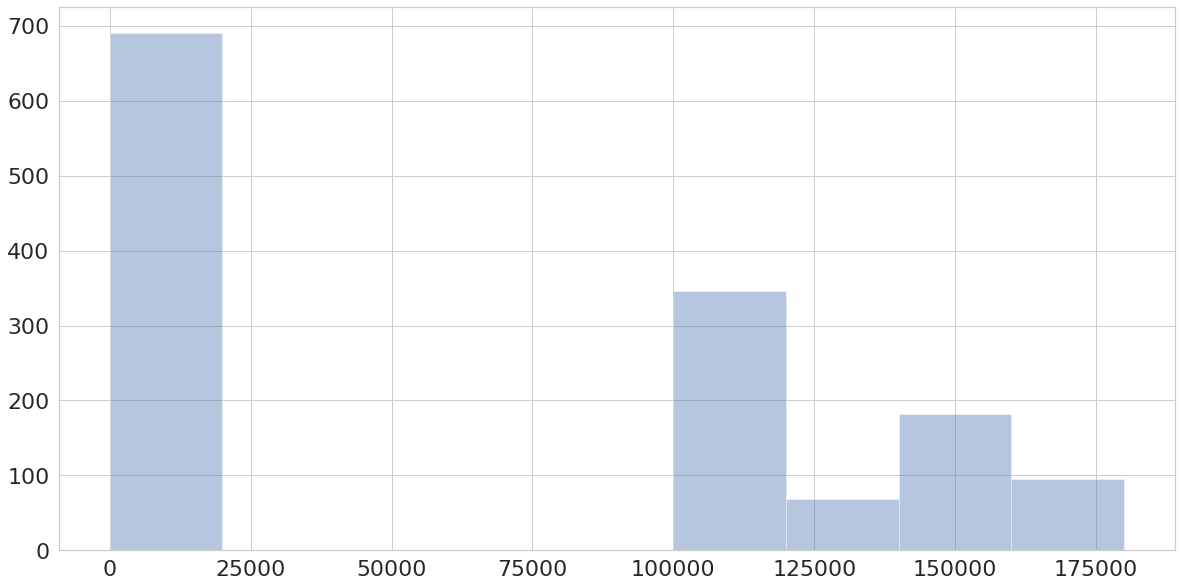

In [35]:
sns.distplot(df_impress, kde = False)

In [18]:
df["ctr"] = df.Clicks / df.Impressions

In [24]:
df[["ad_id", "ctr"]].sort_values("ctr", ascending=False)

,ad_id,ctr
150,738637,0.001059
440,950224,0.000845
505,951779,0.000610
476,951202,0.000565
448,950537,0.000531
...,...,...
270,777166,0.000000
269,777131,0.000000
268,777130,0.000000
266,776935,0.000000


In [29]:
df.query("xyz_campaign_id == 916")

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,ctr
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242
5,708820,916,103929,30-34,M,29,1915,0,0.00,1,1,0.000000
6,708889,916,103940,30-34,M,15,15615,3,4.77,1,0,0.000192
7,708895,916,103941,30-34,M,16,10951,1,1.27,1,1,0.000091
8,708953,916,103951,30-34,M,27,2355,1,1.50,1,0,0.000425
9,708958,916,103952,30-34,M,28,9502,3,3.16,1,0,0.000316


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


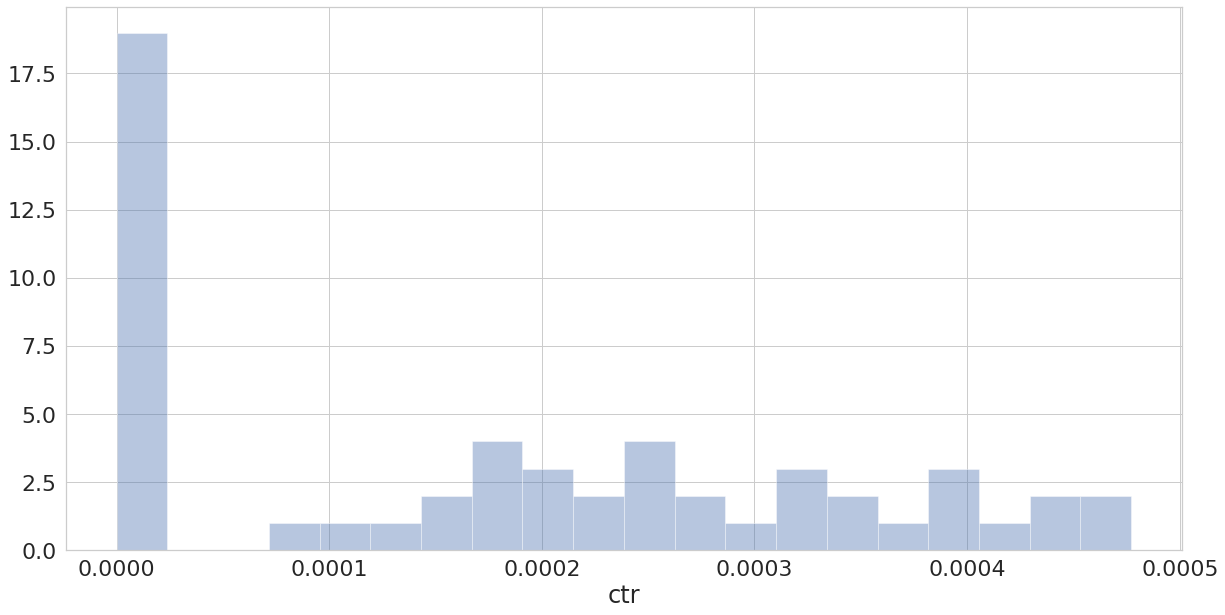

In [32]:
sns.distplot(df.query("xyz_campaign_id == 916").ctr, kde = False, bins=20)

In [36]:
df["cpc"] = df.Spent / df.Clicks

In [37]:
df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,ctr,cpc
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1,0.000136,1.430000
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0,0.000112,0.910000
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0,0.000000,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0,0.000235,1.250000
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1,0.000242,1.290000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2,0.000223,1.421389
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0,0.000188,1.449000
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0,0.000185,1.438929
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710000,8,2,0.000171,1.471926


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


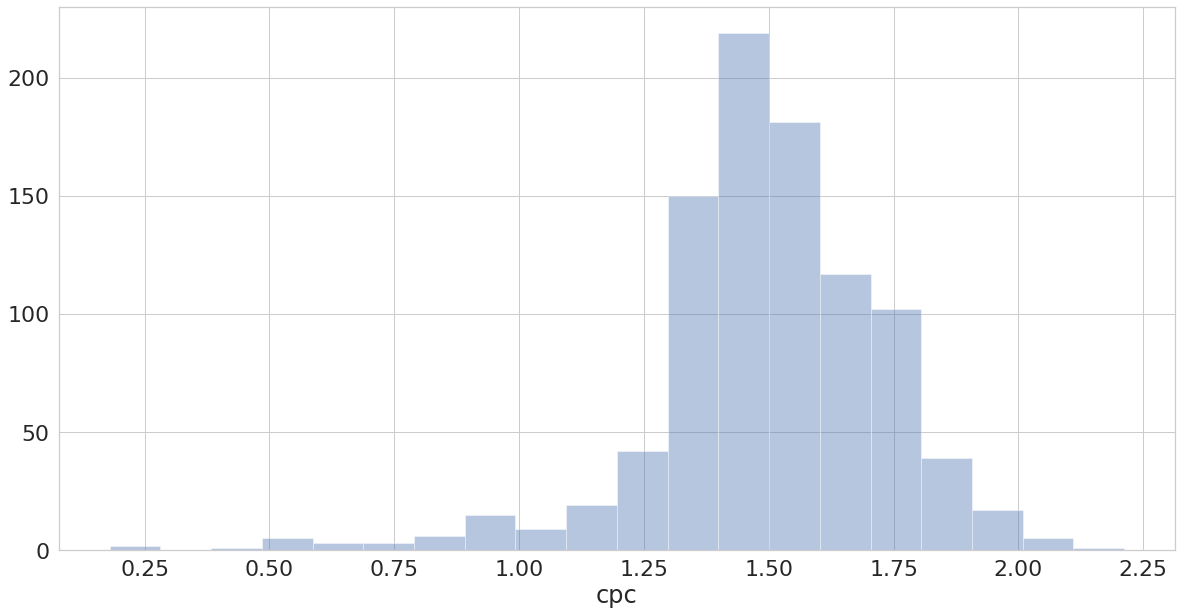

In [38]:
sns.distplot(df.cpc, kde = False, bins=20)

In [41]:
ss.iqr(df.cpc, nan_policy='omit').round(2)

0.25

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


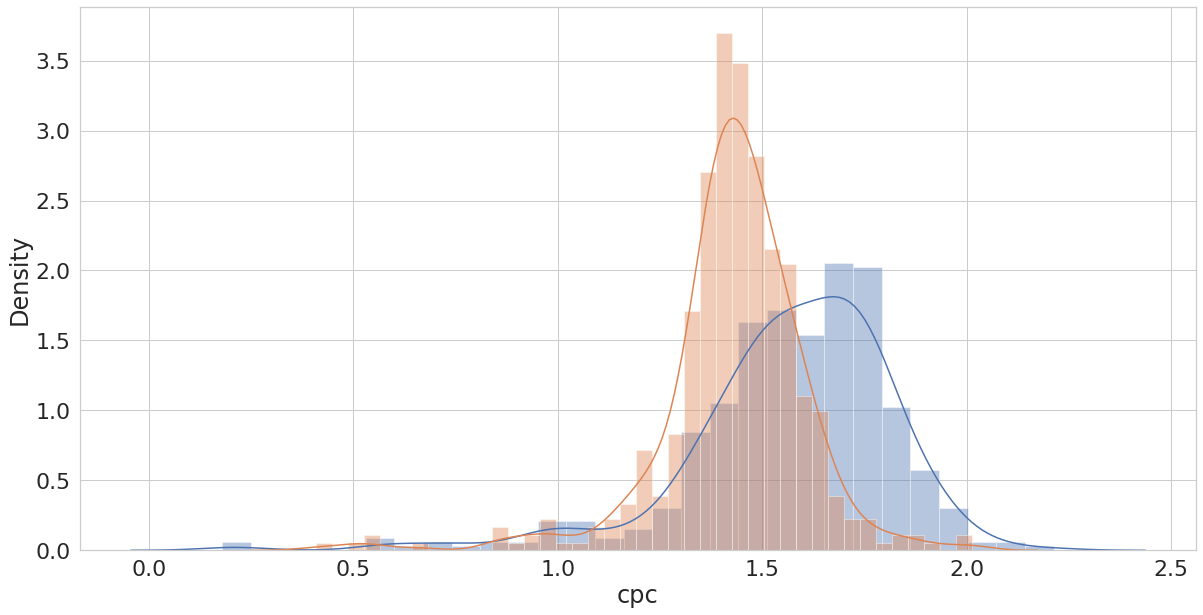

In [44]:
sns.distplot(df.query("gender == 'M'").cpc)
sns.distplot(df.query("gender == 'F'").cpc)

In [57]:
df["convertion"] = df.Approved_Conversion / df.Clicks

In [58]:
df.query("ad_id == 1121814")

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,ctr,cpc,convertion
860,1121814,1178,144659,30-34,F,27,2223278,421,612.300003,38,13,0.000189,1.454394,0.030879


In [61]:
round(df.query("ad_id == 1121814").convertion*100, 2)

860    3.09
Name: convertion, dtype: float64